
#**Problem Title - Yes Bank Stock Closing Price**



###**Problem Statement** - Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. **The main objective is to predict the stock’s closing price of the month.**


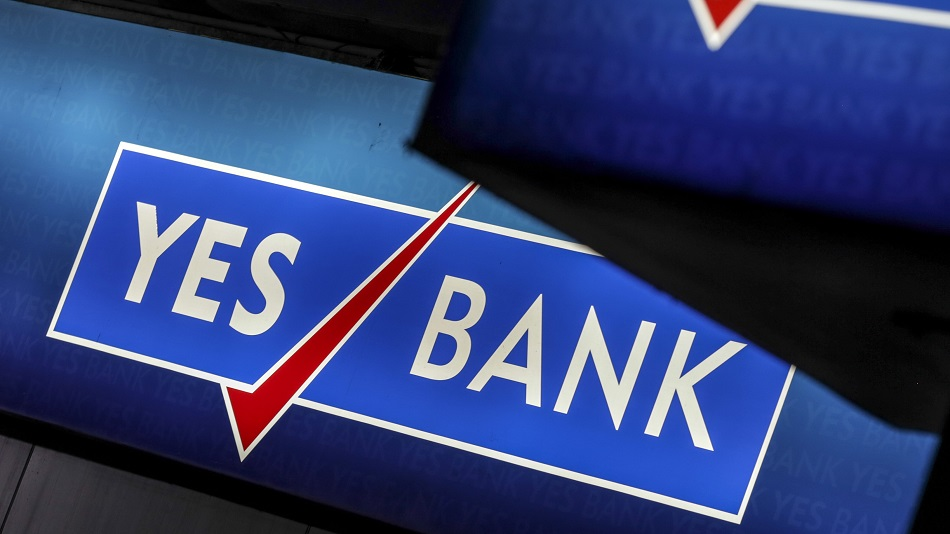

#What is stock?
A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

Since, we've the **YES BANK** Stock price dataset which has the monthly stock prices. It contains the following features:

###**Open** - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

###**High** - The high is the highest price at which a stock traded during a period.

###**Low** -The low is the highest price at which a stock traded during a period.

###**Close** -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity. 

##importing libraries

In [3]:
#to handle multidimensional array and dataframe
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
#importing forcasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
#from statsmodels.graphics.tsaplots import plot_pacf #to plot (p,q)
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
#visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import pacf

In [4]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from pmdarima.arima import auto_arima

In [7]:
#from pmdarima import auto_arima

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv("/content/drive/MyDrive/Dataset-yes bank/data_YesBank_StockPrices.csv", usecols=["Date", "Close"]) 

In [10]:
df.head()

,Date,Close
0,Jul-05,12.46
1,Aug-05,13.42
2,Sep-05,13.30
3,Oct-05,12.99
4,Nov-05,13.41


In [11]:
df.tail()

,Date,Close
180,Jul-20,11.95
181,Aug-20,14.37
182,Sep-20,13.15
183,Oct-20,12.42
184,Nov-20,14.67


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Close   185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


##Preparing Data for Time Series and Basic EDA

To be able to apply ARIMA to a data, the date column needs to be converted into a date time object and then made the index of the dataframe. This is achieved by using strptime of the datetime library. The Given Date format MMM-YY is converted to proper date of YYYY-MM-DD, that Date is set as index and frequency of the Date is set to 'MS' which is monthly

In [13]:
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [14]:
df.head()

,Date,Close
0,2005-07-01,12.46
1,2005-08-01,13.42
2,2005-09-01,13.30
3,2005-10-01,12.99
4,2005-11-01,13.41


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [16]:
#set date as index
ts = df.set_index("Date")
ts.head()

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


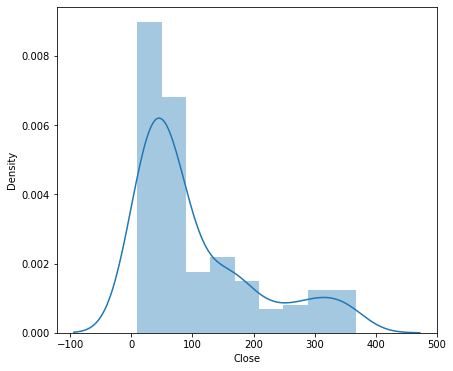

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df['Close'])

The above chart we can see that our close column is positively skewed.

LOG TRANSFORMATION

---
Since our data is skewed, we will perform some transformation during regression analysis.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


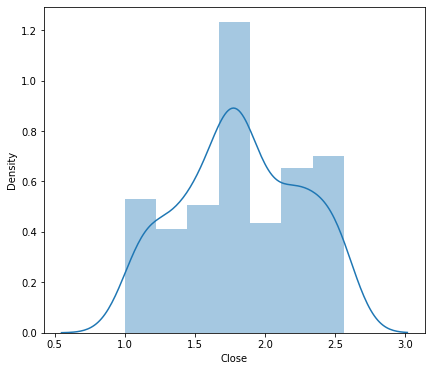

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(np.log10(df["Close"]))

##LSTM model

In [19]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [20]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)

In [21]:
#setting index
data.index = data.Date
data.drop('Date', axis=1, inplace=True)

In [22]:
data.head()

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41


In [23]:
# Create a new dataframe with only the 'Close column 
dataset = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))

In [24]:
#length of training_data_len
print("training_data_len:",training_data_len) 
print("dataset length:", len(dataset))

training_data_len: 167
dataset length: 185


In [25]:
print("training data till date is:")
print()
df.iloc[167]

training data till date is:



Date     2019-06-01 00:00:00
Close                  108.7
Name: 167, dtype: object

In [26]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

Below we will be taking previous 60 days close datasteps to predict the next values so we are converting the data as per our input in LTSM layers.

i.e for taking 0 to 59 days close price to get 60th day price as output, 1 to 60 for 61, 2 to 61 for 62

In [27]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]  #[0:167, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00692892, 0.00961109, 0.00927582, 0.0084097 , 0.00958315,
       0.01042132, 0.01494747, 0.01715467, 0.0282186 , 0.02657018,
       0.02249106, 0.01575771, 0.01726643, 0.02196021, 0.02369245,
       0.03576218, 0.04285874, 0.04746871, 0.05638131, 0.05210662,
       0.05073759, 0.0568004 , 0.06574095, 0.07264193, 0.07809008,
       0.07546379, 0.08767322, 0.09359633, 0.10113992, 0.11128185,
       0.11332141, 0.11019222, 0.06641149, 0.0672776 , 0.05909142,
       0.03595776, 0.04322195, 0.04707756, 0.03953397, 0.01005811,
       0.00637014, 0.0141093 , 0.00631426, 0.0007823 , 0.        ,
       0.01528274, 0.04229996, 0.05504023, 0.06132655, 0.06557331,
       0.08663947, 0.10429705, 0.11340523, 0.12133996, 0.11136567,
       0.10432499, 0.1145228 , 0.13164953, 0.13296267, 0.12251341])]
[0.1369300402324542]

[array([0.00692892, 0.00961109, 0.00927582, 0.0084097 , 0.00958315,
       0.01042132, 0.01494747, 0.01715467, 0.0282186 , 0.02657018,
       0.02249106, 0.01575771, 0.017

In [28]:
print("length of x_train is:", len(x_train))
print("length of y_train is:", len(y_train))

length of x_train is: 107
length of y_train is: 107


In [29]:
print("training data till date is:")
print()
df.iloc[107]

training data till date is:



Date     2014-06-01 00:00:00
Close                 108.38
Name: 107, dtype: object

In [30]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')

# Train the model
model.fit(x_train, y_train, epochs=10, verbose = 2)

Epoch 1/10
4/4 - 8s - loss: 0.1809 - accuracy: 0.0000e+00 - 8s/epoch - 2s/step
Epoch 2/10
4/4 - 0s - loss: 0.0429 - accuracy: 0.0093 - 45ms/epoch - 11ms/step
Epoch 3/10
4/4 - 0s - loss: 0.0190 - accuracy: 0.0093 - 44ms/epoch - 11ms/step
Epoch 4/10
4/4 - 0s - loss: 0.0276 - accuracy: 0.0093 - 44ms/epoch - 11ms/step
Epoch 5/10
4/4 - 0s - loss: 0.0181 - accuracy: 0.0093 - 44ms/epoch - 11ms/step
Epoch 6/10
4/4 - 0s - loss: 0.0205 - accuracy: 0.0093 - 41ms/epoch - 10ms/step
Epoch 7/10
4/4 - 0s - loss: 0.0168 - accuracy: 0.0093 - 43ms/epoch - 11ms/step
Epoch 8/10
4/4 - 0s - loss: 0.0183 - accuracy: 0.0093 - 40ms/epoch - 10ms/step
Epoch 9/10
4/4 - 0s - loss: 0.0159 - accuracy: 0.0093 - 43ms/epoch - 11ms/step
Epoch 10/10
4/4 - 0s - loss: 0.0148 - accuracy: 0.0093 - 49ms/epoch - 12ms/step


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 107 to 184 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [32]:
print("length of x_test is:", len(x_test))
print("length of y_test is:", len(y_test))

length of x_test is: 18
length of y_test is: 18


In [33]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 723ms/step


100.46340969071964

##Results

<ipython-input-34-f9b72835e238>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


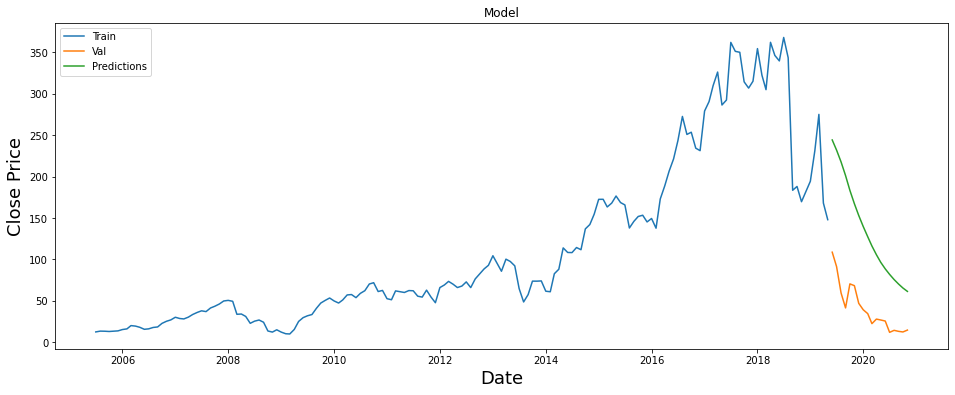

In [34]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

**LSTM Conclusion:** 

above we can see our LSTM model is not that much accurate. more error between acual value and predicted value. our RMSE value is 91.1222 . that means it is far away  from our actual value. 

##Applying Auto ARIMA

###Visualizing Closing Price 

After completing preprocessing step for time series data. lets visualize the closing price of stock

In [35]:
!pip install chart_studio
from chart_studio.plotly import iplot

import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.4 MB/s 


In [36]:
#setting layout for plot
layout = go.Layout(title = "Stock price of yes bank",xaxis= dict(title = "Date",titlefont = dict(size=18,color = "#7f7f7f")),
                   yaxis = dict(title = "Price",titlefont = dict(size = 18,color = "#7f7f7f")))
data = [{'x': df['Date'], 'y':df['Close']}]
plot = go.Figure(data = data,layout=layout)

In [37]:
from plotly.offline import iplot
iplot(plot)

We can observed that there is a distinct seasonality and trend hidden along with the variations. This explains that ARIMA might be a good way for predictions.

Another thing that should be kept in mind is that up until 2018, the stock prices more or less, kept increasing but there was a sudden dip after that. This can be attributed to the Yes bank fraud case against Rana Kapoor. Read more about that here:
https://economictimes.indiatimes.com/topic/yes-bank-scam

The additive model is useful when the seasonal variation is relatively constant over time. The multiplicative model is useful when the seasonal variation increases over time.

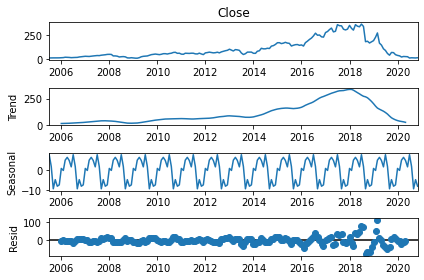

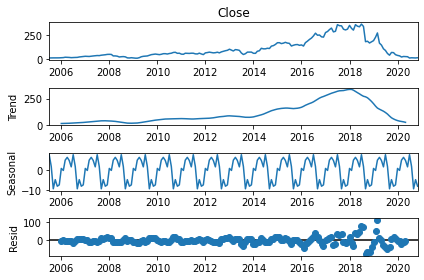

In [38]:
#time series decomposition
decomp = seasonal_decompose(ts["Close"], model = "additive")
decomp.plot()

Now that the dataframe is ready, we divide it into train and test for modeling and testing. For this example, The last two years, Jan 2019- Nov 2020, are taken as test, Rest everything is train


In [39]:
# Set two years for testing
train = ts.iloc[:162]
test = ts.iloc[162:]

In [40]:
print("length of train data:", len(train))
print("length of test data:", len(test))

length of train data: 162
length of test data: 23


In [41]:
print("index 161 closing price and date is:")
print()
print(ts.iloc[161])

index 161 closing price and date is:

Close    181.75
Name: 2018-12-01 00:00:00, dtype: float64


#Time Series Analysis of Stock Prices Using Auto ARIMA

This Notebook analyses the closing stock price of yes bank limited right from the time it got listed (july 2005) untill november 2020. 

Using the mothly stock prices, time series analysis is used to predict the future prices based on trend and seasonal components. auto ARIMA is demonstrated in python and its working is explained in detail.

##Applying Auto ARIMA


Just to give a brief about how Auto ARIMA works. Auto ARIMA is like a grid search for time series models, it tries ARIMA, SARIMA, SARIMAX, all ARIMA related models depending on the parameters that are applied to it. The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. This function is based on the commonly-used R function, forecast::auto.arima

The auto_arima function works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto_arima also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

Here's the link to its documentation and User Guide, if you want to know about it in detail: 

https://alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html

The main idea is that you don't really need to worry about differencing orders and keep trying different orders or look at ACF charts to come to the correct fitted parameters, Auto ARIMA would do that for you automatically.

Here, the parameters which are supplied are: m= 12 indicatinng monthly range of Date

seasonal True, which we saw from the decomposed chart

and max iterations is set to 200 so that it analyses as many possible combinations of parameters before sticking to a local minima. Usually 200 works, However, higher the better, though that may take longer time.

Basic steps to use Auto ARIMA include:

Using the Auto_Arima funtion on the series to obtain Model Parameters (p,d,q) (P, D, Q, m)
Using the parameters obtained, running a model through statsmodels ARIMA/SARIMA on your training set
Obtaining predicted values on the test set based on the model run in Step 2
Comparing and Plotting predictions to expected values
Evaluating the model through MSE OR MAE

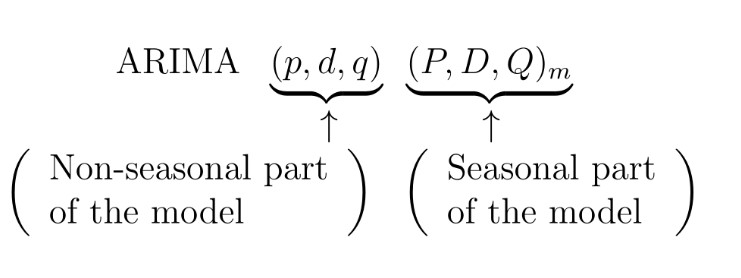

We can split the Arima term into three terms, AR, I, MA:

AR(p) stands for the autoregressive model, the p parameter is an integer that confirms how many lagged series are going to be used to forecast periods ahead.

I(d) is the differencing part, the d parameter tells how many differencing orders are going to be used to make the series stationary.

MA(q) stands for moving average model, the q is the number of lagged forecast error terms in the prediction equation. SARIMA is a seasonal ARIMA and it is used with time series with seasonality.

##Auto ARIMA before removing trend and seasonality

In [42]:
#set date as index
ts = df.set_index("Date")
ts.head()

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41


In [43]:
#Applying the Auto ARIMA Function
model_auto = auto_arima(ts['Close'],m=12,seasonal = True,maxiter=200)

In [44]:
model_auto

ARIMA(maxiter=200, order=(1, 1, 1), scoring_args={},
      seasonal_order=(0, 0, 0, 12), suppress_warnings=True,
      with_intercept=False)

In [45]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  185
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -812.490
Date:                Sun, 25 Dec 2022   AIC                           1630.979
Time:                        10:03:17   BIC                           1640.624
Sample:                    07-01-2005   HQIC                          1634.888
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8165      0.049    -16.784      0.000      -0.912      -0.721
ma.L1          0.9483      0.025     38.149      0.000       0.900       0.997
sigma2       399.9167     17.929     22.305      0.000     364.776     435.058
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              3090.85
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              73.32   Skew:                            -2.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**we want hieghest Log Likeliohood and lowest information criteria (AIC)**

Using auto arima model we get SARIMAX model as best model.

Log likelihood:-812.490

AIC: 1630.979

In [46]:
#statsmodel function implementation
model = SARIMAX(train['Close'],order=(1,1,1))
results = model.fit(maxiter=200)
results.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  162
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -699.260
Date:                Sun, 25 Dec 2022   AIC                           1404.520
Time:                        10:03:17   BIC                           1413.764
Sample:                    07-01-2005   HQIC                          1408.273
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8875      0.079    -11.189      0.000      -1.043      -0.732
ma.L1          0.9695      0.036     26.646      0.000       0.898       1.041
sigma2       345.8068     15.081     22.930      0.000     316.248     375.365
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              5529.42
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):              60.41   Skew:                            -2.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**we want hieghest Log Likeliohood and lowest information criteria (AIC)**

we can see that our log likelihood and aic are improved.

Log likelihood:  -699.260

AIC: 1404.520

##SARIMA

In [47]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, 
                              typ='levels', full_results = True).rename('SARIMA Predictions')

In [48]:
print("starting index is:", start)
print("endinging index is:", end)

starting index is: 162
endinging index is: 184


In [49]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Close'][i]}")

predicted=189.0590444, expected=194.3
predicted=182.5723581, expected=231.2
predicted=188.3292118, expected=275.05
predicted=183.2200755, expected=168.0
predicted=187.7543706, expected=147.95
predicted=183.7302399, expected=108.7
predicted=187.3016061, expected=91.3
predicted=184.1320629, expected=59.5
predicted=186.9449932, expected=41.45
predicted=184.4485524, expected=70.45
predicted=186.6641126, expected=68.3
predicted=184.6978304, expected=46.95
predicted=186.4428815, expected=39.2
predicted=184.8941703, expected=34.55
predicted=186.2686323, expected=22.45
predicted=185.0488143, expected=27.95
predicted=186.1313876, expected=26.85
predicted=185.1706172, expected=25.6
predicted=186.0232891, expected=11.95
predicted=185.2665534, expected=14.37
predicted=185.9381469, expected=13.15
predicted=185.342116 , expected=12.42
predicted=185.871086 , expected=14.67


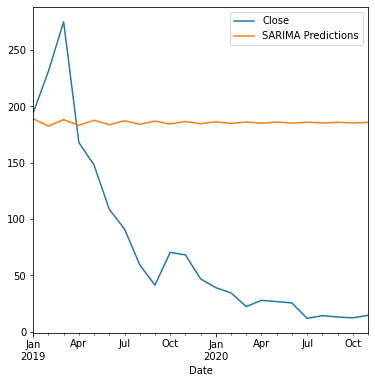

In [50]:
#Plotting Predictions and Original/Expected Values
ax = test['Close'].plot(legend=True,figsize=(6,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [51]:
#Calcalutaing MSE
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Close'], predictions)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 17585.44138


In [52]:
#Calculating RMSE
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Close'], predictions)
print(f'SARIMA RMSE Error: {error:11.10}')

SARIMA RMSE Error: 132.6101104


In [53]:
#accuracy 
R2 = r2_score((test), (predictions))
print("R2 :" ,R2)

R2 : -2.162205364285341


##SARIMAX

In [54]:
#Making Future Predictions of next year that is 2021
model = SARIMAX(ts['Close'],order=(1,1,1))
results = model.fit(maxiter=200)
fcast = results.predict(len(ts),len(ts)+11,typ='levels').rename('SARIMAX Forecast')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



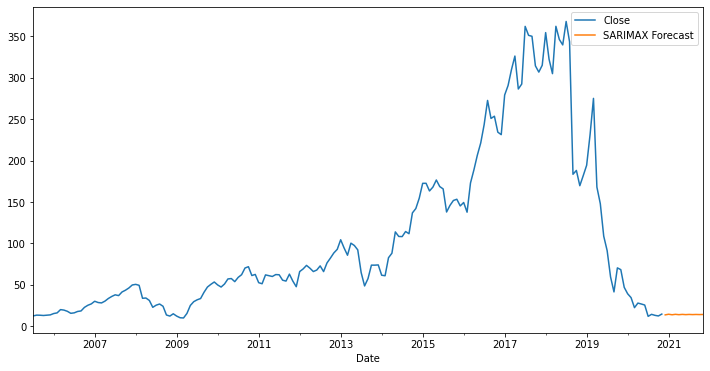

In [55]:
#Plotting Future Predictions with Old values
ax = ts['Close'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

**Model Insights and Discussion:**

As can be seen through the expected and predicted values, initial few are correct but ARIMA is unable to predict the Dip that happened because of the fraud. The MSE was extremely high and not acceptable for prediction models. However, This is fair as it is quite unlikely to be able to predict such a huge dip without having any other parameters in the model such as market reputation. With the trend that the model saw, the model obviously followed that trend pattern and showed prices above or around the last highest price that was observed. Seasonality was kept in place, however that cannot really make any model estimate a Dip without additional information.

To check if Auto ARIMA works well if the data isnt influenced by Frauds or such sudden dips, data from 2018-2020 was neglected for trial. data for 2017 was then considered to be test and the remaining data before that was considered to be train, the model and the results that were obtained as follows:

#Removing trend and seasonality from 2005 to 2017

##Model from 2005 to 2017

###train set from 2005 to 2016

###test set 2017 year

In [56]:
ts2017 = ts.iloc[:150]
train2017 = ts.iloc[:138]
test2017 = ts.iloc[138:150]

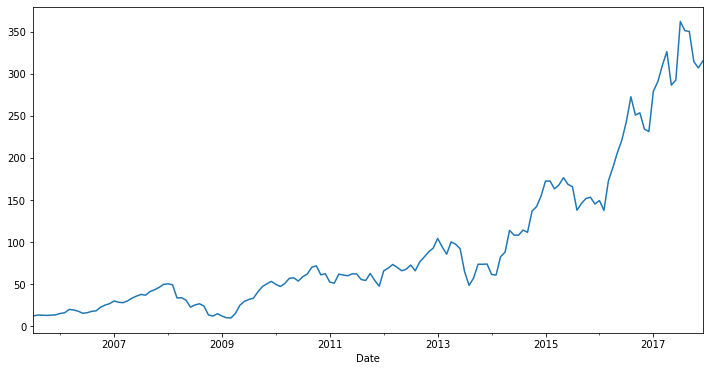

In [57]:
#plotting the data

ax = ts2017['Close'].plot(figsize=(12,6))
ax.autoscale(axis='x',tight=True)

In [58]:
#Applying the Auto ARIMA Function
auto_arima(ts2017['Close'],m=12,seasonal = True,maxiter=200).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -585.994
Date:                Sun, 25 Dec 2022   AIC                           1175.988
Time:                        10:03:23   BIC                           1181.996
Sample:                    07-01-2005   HQIC                          1178.429
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0308      1.079      1.883      0.060      -0.083       4.145
sigma2       152.5996      8.693     17.555      0.000     135.562     169.637
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):               367.61
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):              20.08   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**we want hieghest Log Likeliohood and lowest information criteria (AIC)**

we can see that our log likelihood and aic are improved.

Log likelihood:  -585.994

AIC: 1175.988

In [59]:
#statsmodel function implementation
model2017 = SARIMAX(train2017['Close'],order=(0,1,0))
results2017 = model2017.fit(maxiter=200)
results2017.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  138
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -502.581
Date:                Sun, 25 Dec 2022   AIC                           1007.162
Time:                        10:03:23   BIC                           1010.082
Sample:                    07-01-2005   HQIC                          1008.348
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        89.9334      7.309     12.304      0.000      75.607     104.260
===================================================================================
Ljung-Box (L1) (Q):                   2.37   Jarque-Bera (JB):                34.07
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):              13.24   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**we want hieghest Log Likeliohood and lowest information criteria (AIC)**

we can see that our log likelihood and aic are improved.

Log likelihood:  -502.581

AIC: 1007.162

In [60]:
# Obtain predicted values
start2017=len(train2017)
end2017=len(train2017)+len(test2017)-1
predictions2017 = results2017.predict(start=start2017, end=end2017, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions 2017')

In [61]:
# Compare predictions to expected values
for i in range(len(predictions2017)):
    print(f"predicted={predictions2017[i]:<11.10}, expected={test2017['Close'][i]}")

predicted=231.26     , expected=279.1
predicted=231.26     , expected=290.56
predicted=231.26     , expected=309.82
predicted=231.26     , expected=326.14
predicted=231.26     , expected=286.38
predicted=231.26     , expected=292.37
predicted=231.26     , expected=361.96
predicted=231.26     , expected=351.15
predicted=231.26     , expected=350.0
predicted=231.26     , expected=314.35
predicted=231.26     , expected=306.8
predicted=231.26     , expected=315.05


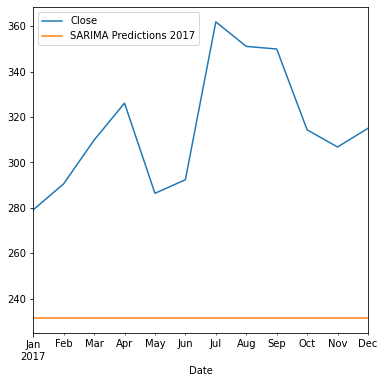

In [62]:
#Plotting Predictions and Original/Expected Values
ax = test2017['Close'].plot(legend=True,figsize=(6,6))
predictions2017.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [63]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test2017['Close'], predictions2017)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 7744.831967


In [64]:
#accuracy 
R2 = r2_score((test2017), (predictions2017))
print("R2 :" ,R2)

R2 : -10.372904694067783


As can be seen by this Model, the 2017 model predictions are still very poor. Though MSE is much better than the one with all data, it is evident that even with infraudulent data, something is wrong.

Upon searching online, I was introduced with the concept of Stationarity. To be able to apply Models like ARIMA, a time series should always be stationary. To know what Staionary time series means, read here: 

https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322

Dickey Fuller test is used to check stationarity of the data which was done next.

**Checking Stationarity**

if test statistic < critical value in the Dickey Fuller Test, series is stationary, otherwise it is not In this case, series came out to be non stationary

In [65]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


#apply adf test on the series
adf_test(ts2017['Close'])

#if test statistic < critical value, series is stationary
#series not stationary

Results of Dickey-Fuller Test:
Test Statistic                   0.430335
p-value                          0.982595
#Lags Used                       6.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


**Detrending for Improved Model**

In order to solve the problem of stationarity, after further searching stuff online The method of de trending was identified appropriate. To know more about detrending, read here: https://machinelearningmastery.com/time-series-trends-in-python/

The concept is basically removing the trend component from the series. Forecasting the trend component separately, seasonality + random component separately and then adding the two together to get the final results.

The Trend componenet is removed in the following cell and the remainder series is converted into a dataframe called detrended:

Text(0.5, 1.0, 'Stock Prices detrended by subtracting the trend component')

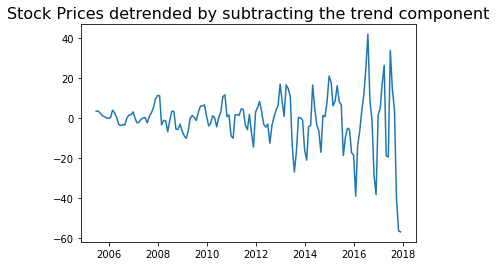

In [66]:
# Using statmodels: Subtracting the Trend Component.
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ts2017['Close'], extrapolate_trend='freq')
detrended = ts2017.Close.values - res.trend
plt.plot(detrended)
plt.title('Stock Prices detrended by subtracting the trend component', fontsize=16)

In [67]:
detrended =  pd.DataFrame(detrended)

Now checking the detrended component in Dickey Fuller Test. Critical Value > Test Statistic Hence, series is stationary now. ARIMA can now be applied easily.

In [68]:
adf_test(detrended.trend)

Results of Dickey-Fuller Test:
Test Statistic                  -5.548965
p-value                          0.000002
#Lags Used                       6.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [69]:
len(detrended)

150

In [70]:
# Set one year for testing
strain = detrended.iloc[:138]
stest = detrended.iloc[138:150]

In [71]:
#SARIMA
auto_arima(detrended.trend,m=12,seasonal = True,maxiter=200).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -552.339
Date:                Sun, 25 Dec 2022   AIC                           1118.678
Time:                        10:03:55   BIC                           1139.752
Sample:                    07-01-2005   HQIC                          1127.240
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0695      0.079      0.883      0.377      -0.085       0.224
ar.L2         -0.5735      0.079     -7.246      0.000      -0.729      -0.418
ar.L3          0.4321      0.051      8.534      0.000       0.333       0.531
ar.L4         -0.4346      0.103     -4.234      0.000      -0.636      -0.233
ma.L1          0.6965      0.051     13.629      0.000       0.596       0.797
ma.L2          0.9425      0.056     16.706      0.000       0.832       1.053
sigma2        90.6433      6.551     13.836      0.000      77.803     103.484
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               131.29
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              17.85   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
smodel = SARIMAX(detrended['trend'],order=(4,0,2))
sresults = smodel.fit(maxiter=200)
sresults.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  150
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -552.339
Date:                Sun, 25 Dec 2022   AIC                           1118.678
Time:                        10:03:55   BIC                           1139.752
Sample:                    07-01-2005   HQIC                          1127.240
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0695      0.079      0.883      0.377      -0.085       0.224
ar.L2         -0.5735      0.079     -7.246      0.000      -0.729      -0.418
ar.L3          0.4321      0.051      8.534      0.000       0.333       0.531
ar.L4         -0.4346      0.103     -4.234      0.000      -0.636      -0.233
ma.L1          0.6965      0.051     13.629      0.000       0.596       0.797
ma.L2          0.9425      0.056     16.706      0.000       0.832       1.053
sigma2        90.6433      6.551     13.836      0.000      77.803     103.484
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               131.29
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              17.85   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
# Obtain predicted values
sstart=len(strain)
send=len(strain)+len(stest)-1
spredictions = sresults.predict(start=sstart, end=send, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions Detrended')

In [74]:
# Compare predictions to expected values
for i in range(len(spredictions)):
    print(f"predicted={spredictions[i]:<11.10}, expected={stest['trend'][i]}")

predicted=-16.32394064, expected=1.638333333333378
predicted=8.174448038, expected=4.885416666666629
predicted=10.08841464, expected=16.739583333333314
predicted=17.24923488, expected=26.393749999999955
predicted=6.272409563, expected=-18.922500000000014
predicted=-20.27061568, expected=-19.445416666666688
predicted=-9.544085394, expected=33.75389520201969
predicted=24.78470945, expected=14.190391414141118
predicted=14.88324901, expected=4.286887626262342
predicted=-2.169476983, expected=-40.116616161616435
predicted=-50.20292826, expected=-56.420119949495245
predicted=-25.32955455, expected=-56.923623737374044


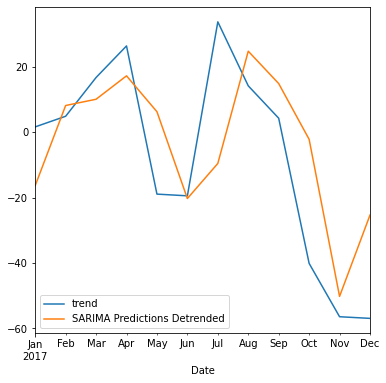

In [75]:
ax = stest['trend'].plot(legend=True,figsize=(6,6))
spredictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [76]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(stest['trend'], spredictions)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 472.7372718


In [77]:
#accuracy 
R2 = r2_score((stest), (spredictions))
print("R2 :" ,R2)

R2 : 0.45752906585650654


Up until now, the detrended componeent is predicted through the ARIMA model and the MSE is SIGNIFICANTLY less. This definitely shows that detrending worked.

However, the process is only half done. Now, the subtracted trend component will be predicted separately. For that the trend component that was subytacyed is used, converted to a dataframe called TRENDY and ARIMA is applied with seasonality = False

In [78]:
res.trend

Date
2005-07-01      9.075607
2005-08-01      9.995814
2005-09-01     10.916021
2005-10-01     11.836228
2005-11-01     12.756435
                 ...    
2017-08-01    336.959609
2017-09-01    345.713112
2017-10-01    354.466616
2017-11-01    363.220120
2017-12-01    371.973624
Name: trend, Length: 150, dtype: float64

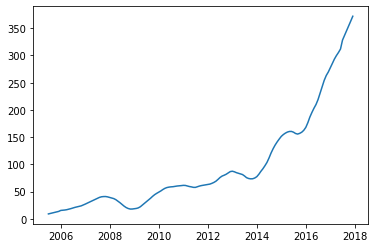

In [79]:
plt.plot(res.trend)

In [80]:
trendy = pd.DataFrame(res.trend)

In [81]:
#SARIMA
auto_arima(trendy.trend,m=12,seasonal = False, maxiter=200).summary()

/usr/local/lib/python3.8/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -256.762
Date:                Sun, 25 Dec 2022   AIC                            515.523
Time:                        10:03:56   BIC                            518.521
Sample:                    07-01-2005   HQIC                           516.741
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.8811      0.062     30.156      0.000       1.759       2.003
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3150.82
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              20.45   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##training and testing from 2005 to 2017

In [82]:
# Set one year for testing
traint = trendy.iloc[:138]
testt = trendy.iloc[138:150]

In [83]:
modelt = SARIMAX(trendy['trend'],order=(0,2,0))
resultst = modelt.fit(maxiter=200)
resultst.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  150
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -256.762
Date:                Sun, 25 Dec 2022   AIC                            515.523
Time:                        10:03:57   BIC                            518.521
Sample:                    07-01-2005   HQIC                           516.741
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.8811      0.062     30.156      0.000       1.759       2.003
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3150.82
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              20.45   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
# Obtain predicted values
start=len(traint)
end=len(traint)+len(testt)-1
predictionst = resultst.predict(start=start, end=end, dynamic=False, typ='levels', full_results = True).rename('SARIMAX Predictions')

In [85]:
# Compare predictions to expected values
for i in range(len(predictionst)):
    print(f"predicted={predictionst[i]:<11.10}, expected={testt['trend'][i]}")

predicted=275.85625  , expected=277.46166666666664
predicted=285.36125  , expected=285.6745833333334
predicted=293.8875   , expected=293.0804166666667
predicted=300.48625  , expected=299.74625000000003
predicted=306.4120833, expected=305.3025
predicted=310.85875  , expected=311.8154166666667
predicted=318.3283333, expected=328.2061047979803
predicted=344.5967929, expected=336.95960858585886
predicted=345.7131124, expected=345.71311237373766
predicted=354.4666162, expected=354.46661616161646
predicted=363.2201199, expected=363.22011994949526
predicted=371.9736237, expected=371.97362373737406


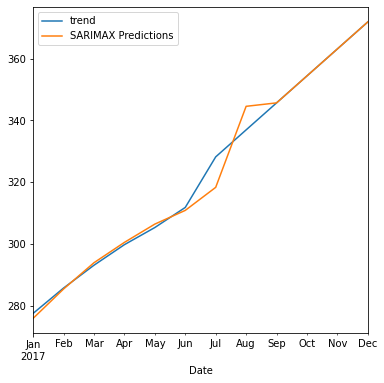

In [86]:
ax = testt['trend'].plot(legend=True,figsize=(6,6))
predictionst.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [87]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(testt['trend'], predictionst)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 13.49315534


In [88]:
#accuracy 
R2 = r2_score((testt), (predictionst))
print("R2 :" ,R2)

R2 : 0.9853927374891569


The Trend is easily predicted with ARIMA with minimum MSE. 

Note: Trend could also be predicted through a linear regression model, I chose to go with ARIMA just to try the seasonal = False part Once both trend component and seasonality + random compoenent were predicted for 2017 They were added together and compared with the original 2017 values

In [89]:
finalpreds = (predictionst + spredictions)

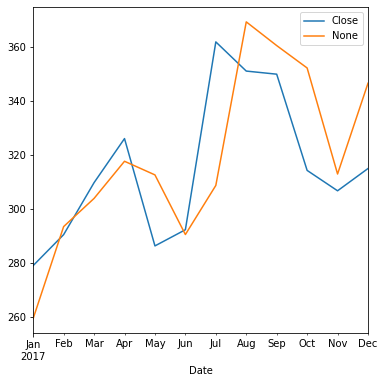

In [90]:
ax = test2017['Close'].plot(legend=True,figsize=(6,6))
finalpreds.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [91]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test2017['Close'], finalpreds)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error: 578.3995924


This model is MUCH MUCH better than the original 2017 model without detrending.

To understand why this works better, you can have a look at this research paper: 

https://research.cs.aalto.fi/aml/Publications/Publication173.pdf 

But a whole lot of it has improved because of the series being staionary.

#Now we will remove trend and seasonality from year 2005 to 2020

In [92]:
ts1 = ts.iloc[:185]
train1 = ts.iloc[:149]
test1 = ts.iloc[149:185]

In [93]:
print("length of our dataset:", len(ts1))
print("length of our train set:",len(train1))
print("length of our test set:", len(test1))

length of our dataset: 185
length of our train set: 149
length of our test set: 36


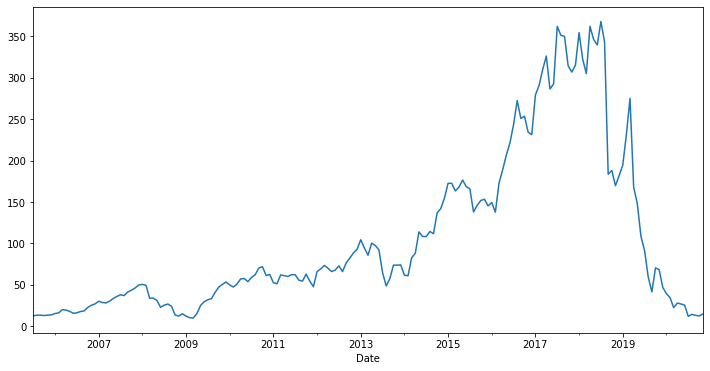

In [94]:
#plotting the data

ax = ts1['Close'].plot(figsize=(12,6))
ax.autoscale(axis='x',tight=True)

###Detranding to improve model performance

Text(0.5, 1.0, 'Stock Prices detrended by subtracting the trend component')

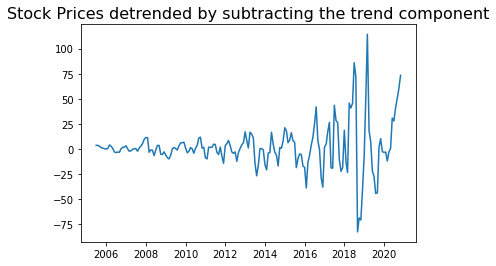

In [95]:
# Using statmodels: Subtracting the Trend Component.
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
res1 = seasonal_decompose(ts1['Close'], extrapolate_trend='freq')
detrended1 = ts1.Close.values - res1.trend
plt.plot(detrended1)
plt.title('Stock Prices detrended by subtracting the trend component', fontsize=16)

In [96]:
detrended1 =  pd.DataFrame(detrended1)

In [97]:
adf_test(detrended1.trend)

Results of Dickey-Fuller Test:
Test Statistic                  -2.761404
p-value                          0.064002
#Lags Used                      14.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (5%)             -2.878696
Critical Value (10%)            -2.575917
dtype: float64


In [98]:
len(detrended1)

185

In [99]:
# Set three year for testing
strain1 = detrended1.iloc[:149]
stest1 = detrended1.iloc[149:185]

print("length of our strain1 set:",len(strain1))
print("length of our stest1 set:", len(stest1))

length of our strain1 set: 149
length of our stest1 set: 36


In [100]:
#SARIMA
auto_arima(detrended1.trend,m=12,seasonal = True,maxiter=200).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  185
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -788.457
Date:                Sun, 25 Dec 2022   AIC                           1584.914
Time:                        10:04:05   BIC                           1597.796
Sample:                    07-01-2005   HQIC                          1590.135
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4049      0.086     16.252      0.000       1.235       1.574
ar.L2         -0.6787      0.050    -13.523      0.000      -0.777      -0.580
ma.L1         -0.7778      0.088     -8.865      0.000      -0.950      -0.606
sigma2       293.0009     14.834     19.752      0.000     263.927     322.075
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               639.52
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              73.76   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
smodel1 = SARIMAX(detrended1['trend'],order=(4,0,2))
sresults1 = smodel1.fit(maxiter=200)
sresults1.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  185
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -780.547
Date:                Sun, 25 Dec 2022   AIC                           1575.094
Time:                        10:04:06   BIC                           1597.637
Sample:                    07-01-2005   HQIC                          1584.230
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9467      0.066     14.281      0.000       0.817       1.077
ar.L2         -1.1964      0.079    -15.132      0.000      -1.351      -1.041
ar.L3          0.7050      0.056     12.567      0.000       0.595       0.815
ar.L4         -0.4129      0.061     -6.723      0.000      -0.533      -0.293
ma.L1         -0.2511      0.041     -6.098      0.000      -0.332      -0.170
ma.L2          0.8884      0.043     20.891      0.000       0.805       0.972
sigma2       267.4320     18.218     14.680      0.000     231.725     303.139
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               308.28
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):              71.31   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
# Obtain predicted values
sstart1=len(strain1)
send1=len(strain1)+len(stest1)-1
spredictions1 = sresults1.predict(start=sstart1, end=send1, dynamic=False, typ='levels', full_results = True).rename('SARIMA Predictions Detrended')

In [103]:
# Compare predictions to expected values
for i in range(len(spredictions1)):
    print(f"predicted={spredictions1[i]:<11.10}, expected={stest1['trend'][i]}") 

predicted=-33.2202959, expected=-18.71208333333334
predicted=-14.5716725, expected=18.472499999999968
predicted=33.12721912, expected=-13.65208333333328
predicted=2.179865581, expected=-23.739583333333314
predicted=-20.44126896, expected=45.61250000000001
predicted=14.71234942, expected=40.73958333333326
predicted=25.04597793, expected=45.4083333333333
predicted=54.21903244, expected=85.93541666666664
predicted=47.04200106, expected=71.90208333333334
predicted=2.385128792, expected=-83.01041666666663
predicted=-79.23427822, expected=-69.0812499999999
predicted=-29.29523836, expected=-71.1354166666666
predicted=-53.38474699, expected=-41.15416666666661
predicted=-8.527622261, expected=-7.458333333333286
predicted=31.14383811, expected=52.79583333333338
predicted=54.77363365, expected=114.39166666666668
predicted=61.12798273, expected=18.15833333333333
predicted=-15.60297352, expected=7.23124999999996
predicted=0.06249716636, expected=-22.17916666666669
predicted=-38.20829007, expected=-

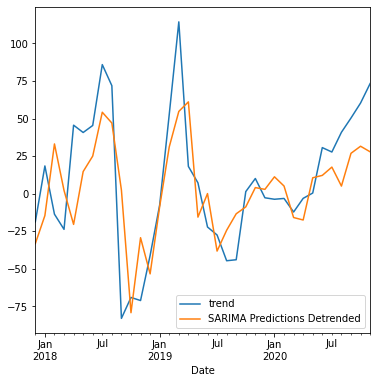

In [104]:
ax = stest1['trend'].plot(legend=True,figsize=(6,6))
spredictions1.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [105]:
res1.trend

Date
2005-07-01     9.075607
2005-08-01     9.995814
2005-09-01    10.916021
2005-10-01    11.836228
2005-11-01    12.756435
                ...    
2020-07-01   -15.795107
2020-08-01   -26.508632
2020-09-01   -37.222158
2020-10-01   -47.935684
2020-11-01   -58.649209
Name: trend, Length: 185, dtype: float64

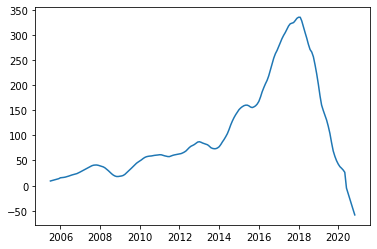

In [106]:
plt.plot(res1.trend)

In [107]:
trendy1 = pd.DataFrame(res1.trend)

In [108]:
#SARIMA
auto_arima(trendy1.trend,m=12,seasonal = False, maxiter=200).summary()

/usr/local/lib/python3.8/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  185
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -456.327
Date:                Sun, 25 Dec 2022   AIC                            918.655
Time:                        10:04:08   BIC                            928.283
Sample:                    07-01-2005   HQIC                           922.558
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5328      0.088      6.082      0.000       0.361       0.705
ma.L1         -0.7447      0.099     -7.520      0.000      -0.939      -0.551
sigma2         8.5728      0.310     27.664      0.000       7.965       9.180
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11356.52
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              67.33   Skew:                            -3.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

####training and testing from 2005 to 2020

In [109]:
# Set three year for testing
strain2 = trendy1.iloc[:149]
stest2 = trendy1.iloc[149:185]

print("length of our strain1 set:",len(strain2))
print("length of our stest1 set:", len(stest2))

length of our strain1 set: 149
length of our stest1 set: 36


In [110]:
modelt1 = SARIMAX(trendy1['trend'],order=(0,2,0))
resultst1 = modelt1.fit(maxiter=200)
resultst1.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  185
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -461.910
Date:                Sun, 25 Dec 2022   AIC                            925.819
Time:                        10:04:08   BIC                            929.029
Sample:                    07-01-2005   HQIC                           927.120
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         9.1187      0.198     45.959      0.000       8.730       9.508
===================================================================================
Ljung-Box (L1) (Q):                   5.71   Jarque-Bera (JB):             14912.95
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):             114.17   Skew:                            -2.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
# Obtain predicted values
start2=len(strain2)
end2=len(strain2)+len(stest2)-1
predictionst1 = resultst1.predict(start=start2, end=end2, dynamic=False, typ='levels', full_results = True).rename('SARIMAX Predictions')

In [112]:
# Compare predictions to expected values
for i in range(len(predictionst1)):
    print(f"predicted={predictionst1[i]:<11.10}, expected={stest2['trend'][i]}")

predicted=333.2904167, expected=333.76208333333335
predicted=338.2225   , expected=335.9775
predicted=338.1929167, expected=335.9020833333333
predicted=335.8266667, expected=328.6395833333333
predicted=321.3770833, expected=316.4375
predicted=304.2354167, expected=305.46041666666673
predicted=294.4833333, expected=294.1916666666667
predicted=282.9229167, expected=281.96458333333334
predicted=269.7375   , expected=271.49791666666664
predicted=261.03125  , expected=266.4604166666666
predicted=261.4229167, expected=257.1312499999999
predicted=247.8020833, expected=240.7854166666666
predicted=224.4395833, expected=222.9041666666666
predicted=205.0229167, expected=201.7583333333333
predicted=180.6125   , expected=178.4041666666666
predicted=155.05     , expected=160.65833333333333
predicted=142.9125   , expected=149.84166666666667
predicted=139.025    , expected=140.71875000000003
predicted=131.5958333, expected=130.8791666666667
predicted=121.0395833, expected=118.8
predicted=106.7208333, 

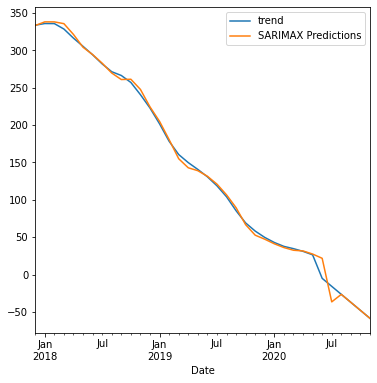

In [113]:
ax = stest2['trend'].plot(legend=True,figsize=(6,6))
predictionst1.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [114]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(stest2['trend'], predictionst1)
print(f'SARIMAX MSE Error: {error:11.10}')

SARIMAX MSE Error: 42.30474194


In [115]:
#accuracy 
R2 = r2_score((stest2), (predictionst1))
print("R2 :" ,R2)

R2 : 0.997378554436448


In [116]:
finalpreds1 = (predictionst1 + spredictions1)

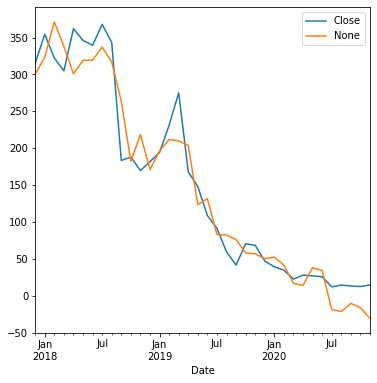

In [117]:
ax = test1['Close'].plot(legend=True,figsize=(6,6))
finalpreds1.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [118]:
from sklearn.metrics import mean_squared_error

error_ = mean_squared_error(test1['Close'], finalpreds1)
print(f'SARIMAX MSE Error: {error_:11.10}')

SARIMAX MSE Error: 989.4618525


In [119]:
#Calculating RMSE
from statsmodels.tools.eval_measures import rmse

error_1 = rmse(test1['Close'], finalpreds1)
print(f'SARIMAX RMSE Error: {error_1:11.10}')

SARIMAX RMSE Error: 31.45571256


In [120]:
#accuracy 
R2 = r2_score((test1), (finalpreds1))
print("R2 :" ,R2)

R2 : 0.9390713186223358


This model is MUCH MUCH better than the without detrending.

To understand why this works better, you can have a look at this research paper: 

https://research.cs.aalto.fi/aml/Publications/Publication173.pdf 

But a whole lot of it has improved because of the series being staionary.